In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline

In [2]:
bank_data = pd.read_csv('bankmarketing.csv')

In [3]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
import category_encoders as ce

In [6]:
bank_data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

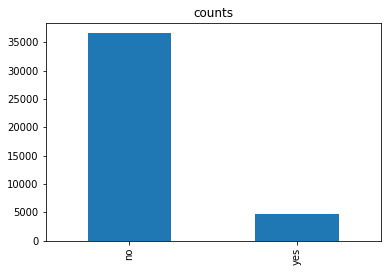

In [7]:
bank_data['y']. value_counts().plot(kind='bar', title = 'counts')

In [8]:
import imblearn

In [12]:
from sklearn.preprocessing import LabelEncoder
lad = LabelEncoder()
for col in bank_data.columns:
    bank_data[col]=lad.fit_transform(bank_data[col])
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,...,1,26,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1


In [13]:
y =bank_data['y']

In [14]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [15]:
X = bank_data.drop('y', axis=1)

In [16]:
bank_data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [17]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,334,0,26,0,1,5,25,0,171,0
41184,29,1,1,5,0,0,0,0,7,0,383,0,26,0,1,5,25,0,171,0
41185,39,5,1,6,0,2,0,0,7,0,189,1,26,0,1,5,25,0,171,0
41186,27,9,1,5,0,0,0,0,7,0,442,0,26,0,1,5,25,0,171,0


In [18]:
from imblearn import over_sampling


In [19]:
from imblearn.over_sampling import  SMOTE
from sklearn.naive_bayes import MultinomialNB

In [20]:
#Define Pipeline
steps = [('over', SMOTE()), ('model',MultinomialNB() )]
pipeline = Pipeline(steps=steps)

In [21]:
cv = RepeatedStratifiedKFold(n_splits =10, n_repeats=3, random_state =1)
scores= cross_val_score(pipeline, X,y, scoring='roc_auc', cv=cv, n_jobs=-1)


In [22]:
np.mean(scores)

0.8928401415299011